In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [3]:
# importing file
zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname = 'jena_climate_2009_2016.csv.zip',
    extract = True
)

csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [4]:
data = pd.read_csv(csv_path)
data.shape

(420551, 15)

In [5]:
data = data[5::6]
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [6]:
# making datetime the index of our new dataset
data.index = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [7]:
data.drop(['Date Time'], axis=1, inplace=True)
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


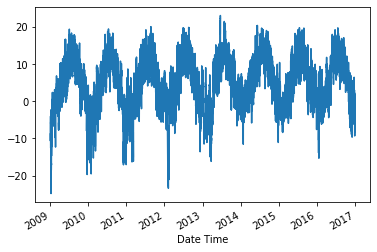

In [8]:
temp = data['Tdew (degC)']
temp.plot()

In [9]:
# x metrics : y metric
# [[[1],[2],[3],[4],[5]]][6]
# [[2,3,4,5,6]][7]
# [[3,4,5,6,7]][8]
def data_to_X_y(data, window_size=5):
  data_as_np = data.to_numpy()
  X = []
  y = []
  for i in range(len(data_as_np)-window_size):
    row = [[a] for a in data_as_np[i:i+5]]
    X.append(row)
    label = data_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [10]:
WINDOW_SIZE = 5
X, y = data_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [11]:
# splitting into training validation and testing
xtrain, ytrain = X[:60000], y[:60000]
xval, yval = X[60000:65000], y[60000:65000]
xtest, ytest = X[65000:], y[65000:]
xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape,ytest.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [12]:
# modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [13]:
# creating a model
model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [14]:
# callbacks for checking validity
cb = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [15]:
# fitting the model
model.fit(xtrain, ytrain, validation_data=[xval,yval], epochs=10, callbacks=[cb])

Epoch 1/10
1860/1875 [============================>.] - ETA: 0s - loss: 15.7353 - root_mean_squared_error: 3.9668

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 15.6225 - root_mean_squared_error: 3.9525 - val_loss: 0.6174 - val_root_mean_squared_error: 0.7857
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.9605 - root_mean_squared_error: 0.9801

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.9598 - root_mean_squared_error: 0.9797 - val_loss: 0.3526 - val_root_mean_squared_error: 0.5938
Epoch 3/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.4643 - root_mean_squared_error: 0.6814

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4640 - root_mean_squared_error: 0.6812 - val_loss: 0.3037 - val_root_mean_squared_error: 0.5511
Epoch 4/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.3874 - root_mean_squared_error: 0.6224

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3874 - root_mean_squared_error: 0.6224 - val_loss: 0.2809 - val_root_mean_squared_error: 0.5300
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.3638 - root_mean_squared_error: 0.6031

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3644 - root_mean_squared_error: 0.6037 - val_loss: 0.2717 - val_root_mean_squared_error: 0.5213
Epoch 6/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.3567 - root_mean_squared_error: 0.5972

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3565 - root_mean_squared_error: 0.5971 - val_loss: 0.2716 - val_root_mean_squared_error: 0.5211
Epoch 7/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.3528 - root_mean_squared_error: 0.5939

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.2685 - val_root_mean_squared_error: 0.5181
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3508 - root_mean_squared_error: 0.5923 - val_loss: 0.2705 - val_root_mean_squared_error: 0.5201
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3502 - root_mean_squared_error: 0.5918

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3500 - root_mean_squared_error: 0.5916 - val_loss: 0.2666 - val_root_mean_squared_error: 0.5163
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.3488 - root_mean_squared_error: 0.5906

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3485 - root_mean_squared_error: 0.5904 - val_loss: 0.2659 - val_root_mean_squared_error: 0.5157


In [61]:
from tensorflow.keras.models import load_model
model = load_model('model/')

In [70]:
# on train data
train_predictions = model.predict(xtrain).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':ytrain})
train_results

,Train Predictions,Actuals
0,-10.954630,-10.62
1,-10.639145,-10.10
2,-9.825107,-9.05
3,-8.515160,-8.84
4,-8.700113,-8.17
...,...,...
59995,2.265425,2.92
59996,3.108570,4.18
59997,4.342845,5.79
59998,6.057116,6.84


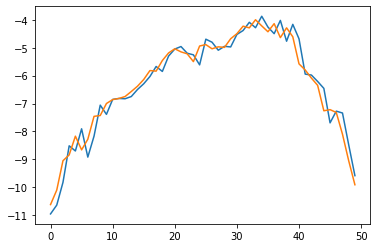

In [71]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actuals'][:50])

In [74]:
# on validation data
val_predictions = model.predict(xval).flatten()
val_results = pd.DataFrame(data={'Validation Predictions':val_predictions, 'Actuals':yval})
val_results

,Validation Predictions,Actuals
0,7.780329,7.12
1,6.926463,7.24
2,7.163238,8.25
3,8.425373,8.24
4,8.236818,8.52
...,...,...
4995,12.457261,13.23
4996,13.271226,13.14
4997,13.096072,13.00
4998,12.905065,12.92


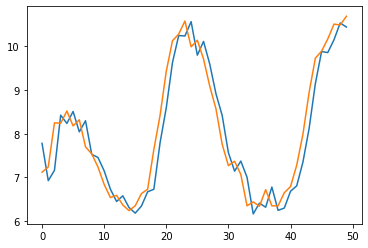

In [75]:
import matplotlib.pyplot as plt
plt.plot(val_results['Validation Predictions'][:50])
plt.plot(val_results['Actuals'][:50])